# Homework 5: Ups and Downs of Discretization

#### Overview:
In this homework, you will consider a classic example of an ordinary differential equation - the harmonic oscillator. In particular, you'll first consider the analytical solution and then compare with a numerical solution by discretizing the equation.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [2]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt

## Problem Description
The set-up for this equation is relatively simple: consider the following diagram which shows a mass on a string set up on a horizontal track:

![Spring Diagram](Spring_Diagram.png)

In this scenario, the weight has mass $m$ and the string has a certain "stiffness". Further, we may consider friction on the track as the mass moves back and forth.

#### Physical Setting

There are three laws that describe the setting:

##### Hooke's Law
Hooke's law dictates that a spring experiences a restoring force which is proportional to its displacement. The constant of proportionality ($k$) reflects the stiffness of the spring. The force is written as:

$$
F_{Hooke} = -kx
$$

##### Friction
An object in motion along a surface experiences a force proportional to its speed. The constant of proportionality ($\mu$) reflects the "bumpiness" of the surface. The force is written as

$$
F_{friction} = -\mu x'
$$

##### Newton's Second Law
Newton's second law indicates that the forces on an object are equal to its mass times its acceleration, i.e.

$$
F = ma = mx''
$$


#### Differential Equation
By equating the total force $F$ to that of friction and Hooke's law, we can formulate the differential equation for the solution as:

$$
x''(t) + \frac{\mu}{m}x'(t) + \frac{k}{m}x(t) = 0
$$



##### Initial Conditions
If we'd like to predict the full trajectory of our mass on the spring through time we also need to have the initial conditions - where it starts and how fast it is moving. For this example, let's consider that we stretch the spring a give distance $x_0$ from is starting position and let it go from there. In other words:

$$
\begin{align}
x(0) &= x_0\\
x'(0) &= 0
\end{align}
$$

where $x_0$ is the initial displacement of the weight and $0$ represents the initial velocity of the weight (at rest). 

#### Note:
For this homework, assume that $\mu = 0$ so that there is no friction and the equation simplifies to 
$$
x''(t) + \frac{k}{m}x(t) = 0
$$
Complete the following parts with this assumption.

#### Optional Challenge
If you'd like a challenge, then you can instead solve for $\mu \neq 0$ in the parts below. 

## Part 1: An Analytical Solution

In this example, the analytical solutions for the trajectory for the mass over time are given by:

##### Option with $\mu = 0$:

$$
x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} t\right)
$$

##### Challenge Option (with $\mu \neq 0$):

$$
x(t) = x_0 \exp\left( -\frac{\mu}{2m}t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2} }t \right) 
$$

For whichever option you are pursuing in this homework, show that
1. The solution indeed satisfies the differential equation
2. The solution satisfies the initial condition $x(0)= x_0$

If you are familiar with LaTex, you can enter you solutions here. Otherwise, you can write you solutions on paper, scan them, and turn them in on Canvas.

#### Solution:

## Analytical Solution Derivation

Derivation under the assumption that $\mu = 0$:
$$
x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} t\right)
$$

$$
x'(t) = -x_0\left(\sqrt{\frac{k}{m}}\right)\sin\left(\sqrt{\frac{k}{m}} t\right)
$$

$$
x''(t) = -x_0\cos\left(\sqrt{\frac{k}{m}} t\right)\frac{k}{m}
$$
Confirm that this satisfies the differential equation:
$$
x''(t) + \frac{k}{m}x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} t\right)\frac{k}{m} -x_0\cos\sqrt{\frac{k}{m}} t\left(\frac{k}{m}\right)= 0
$$
$$ 0 = 0 $$
The solution meets the initial condition 
$ x(0) = x_0 $
$$
x(0) = x_0 \cos\left(\sqrt{\frac{k}{m}} 0\right) = x_0 \cos(0) = x_0\cdot1 = x_0
$$
$$ x(0) = x_0 $$

## Part 2: Analytical Solution Plot

Now that you have verified the equation is a solution, create a plot of the solution below.

#### Solution:

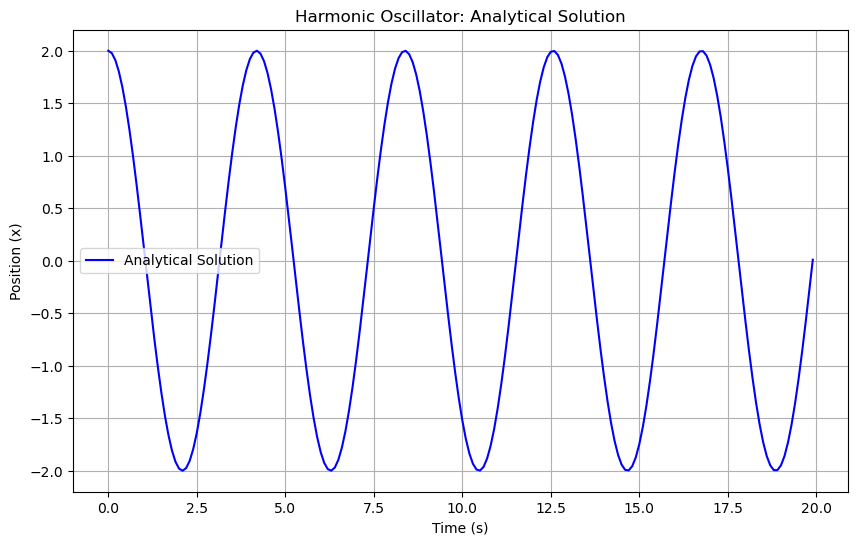

In [9]:
# Define constants
m = 1  
k = 2.25  

x_0 = 2  
v_0 = 0 

def analytical_solution(t):
    return x_0 * np.cos(np.sqrt(k / m) * t)

t_analytical = np.arange(0, 20, 0.1)
x_analytical = analytical_solution(t_analytical)

plt.figure(figsize=(10, 6))
plt.plot(t_analytical, x_analytical, label='Analytical Solution', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Position (x)')
plt.title('Harmonic Oscillator: Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()

## Part 3: Discretize the Solution

With the analytical solution in hand, next we'll work to solve the equation numerically.

In class, we saw a few different "difference methods" to approximate a derivative numerically. In this problem, write down a numerical approximation for $x''(t)$.

If you are pursuing the challenge option, then also write down a numerical approximation for $x'(t)$. 

As above, you can either write you equations here or on a page submitted to Canvas.

#### Solution:

$$
x''(t) \approx \frac{x(t+\Delta t)-2x(t)+x(t-\Delta t)}{\Delta t^2}
$$


## Part 4: Derive a time-stepping scheme

Now that you've got an approximation for $x''(t)$ (and $x'(t)$ for option 2), substitute this approximation into the differential equation and derive a time-stepping scheme. In other words, one side of your equation should have the term $x(t+\Delta t)$ and the other side of your equation should have other terms that do not include $x(t+\Delta t)$. This will allow you to estimate $x$ at a time $\Delta t$ seconds further in the future:

As above, you can either write your equations here or on a page submitted to Canvas.

#### Solution:

## Part 4: Derive a Time-Stepping Scheme

We start with the differential equation:

$$
x''(t) + \frac{k}{m}x(t) = 0
$$

Approximating \( x''(t) \) using the central difference formula:

$$
\frac{x(t+\Delta t)-2x(t)+x(t-\Delta t)}{\Delta t^2} + \frac{k}{m}x(t) = 0
$$

Rearranging to solve 

$$
x(t+\Delta t) = 2x(t) - x(t-\Delta t) - \frac{k}{m}x(t) \Delta t^2
$$


## Part 5: Numerical Solution
Using your timestepping scheme, create a numerical solution to the differential equation for the timesteps given in the array below.

Note that your solution will start at $t=0$ but your timestepping scheme will have a term for $x(t-\Delta t)$. In this case, substitute $x(0)$ for $x(-\Delta t)$ for the first timestep only.

#### Solution:

In [15]:
def numerical_solution(delta_t):
    n_timesteps = int(20 / delta_t)
    t_numerical = np.arange(0, 20, delta_t)
    x_numerical = np.zeros(n_timesteps)
    x_numerical[0] = x_0  
    x_numerical[1] = x_0  

    for i in range(1, n_timesteps - 1):
        x_numerical[i + 1] = 2 * x_numerical[i] - x_numerical[i - 1] - (k / m) * (delta_t)**2 * x_numerical[i]

    return t_numerical, x_numerical

delta_t = 0.1 
t_numerical, x_numerical = numerical_solution(delta_t)

## Part 6: Numerical Solution
Now, plot the numerical solution on the same plot as the analytical solution to compare results. Note that you can copy/paste/edit your plotting code from above here.

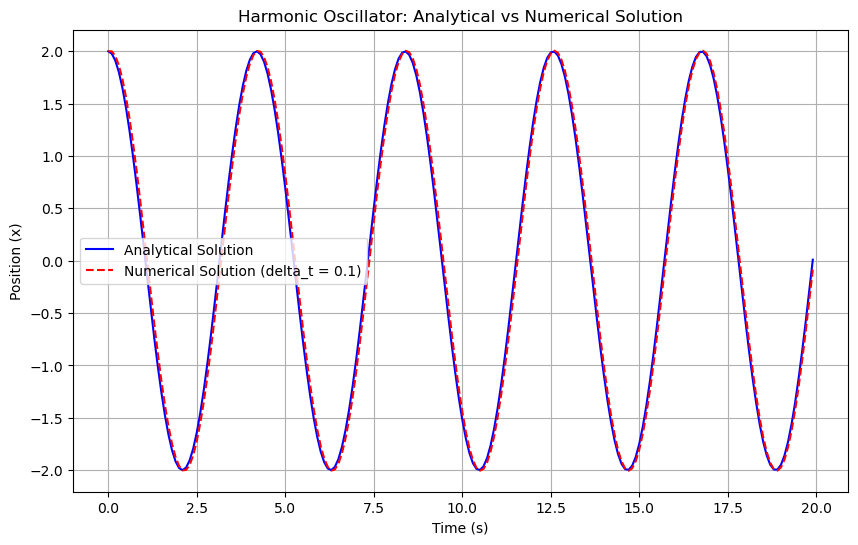

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(t_analytical, x_analytical, label='Analytical Solution', color='blue')
plt.plot(t_numerical, x_numerical, '--', label=f'Numerical Solution (delta_t = {delta_t})', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Position (x)')
plt.title('Harmonic Oscillator: Analytical vs Numerical Solution')
plt.legend()
plt.grid(True)
plt.show()

## Part 7: Stability of the Numerical Solution
In the solution above, the timestep $\Delta t$ given in the starter code ensures that the solution is stable. Try a few other values for $\Delta t$ to determine when the solution is stable. In other words, what range of timesteps gives you values in the same range as the analytical solution? What range gives you values that cause the solution to "blow up"? What leads to these numerical instabilities?

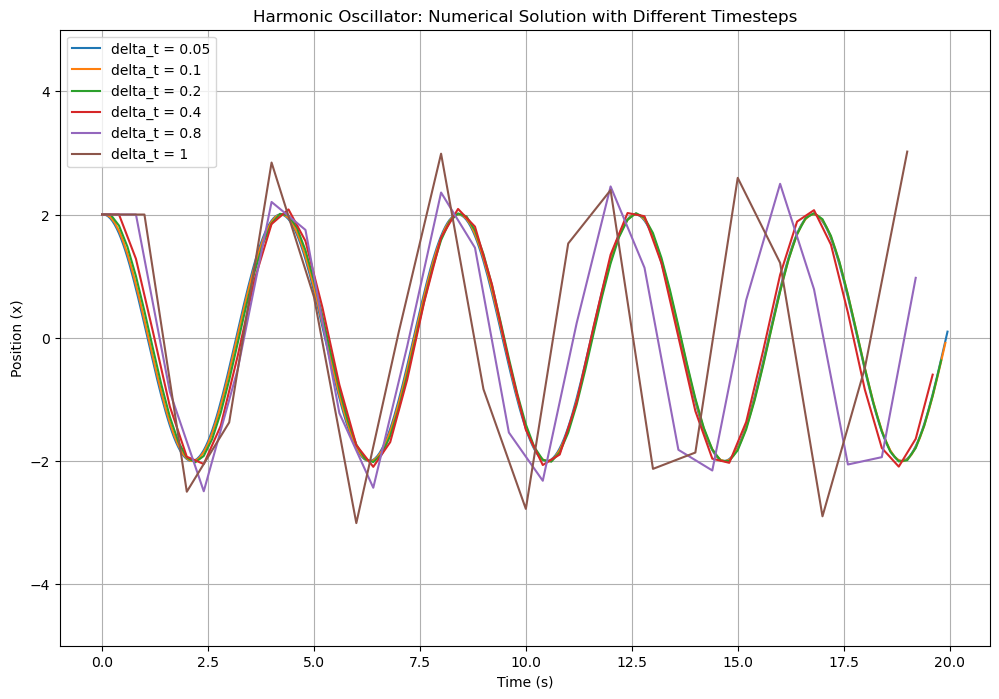

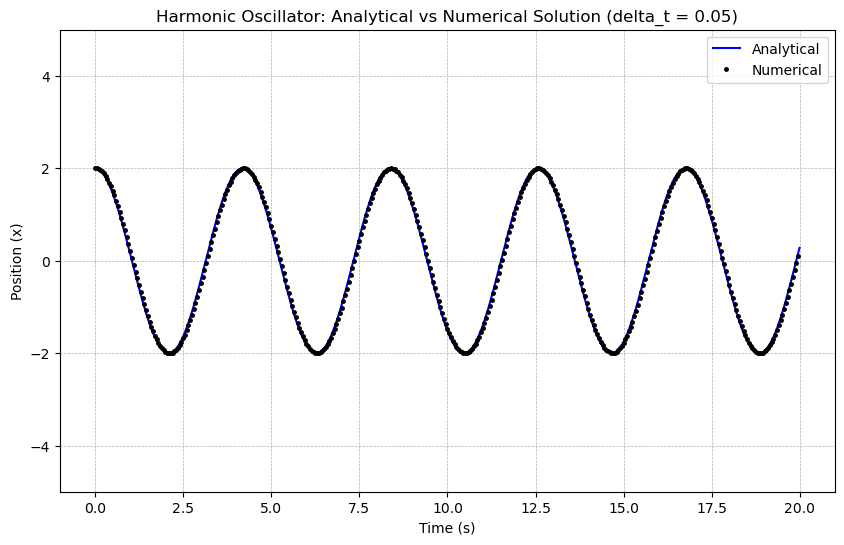

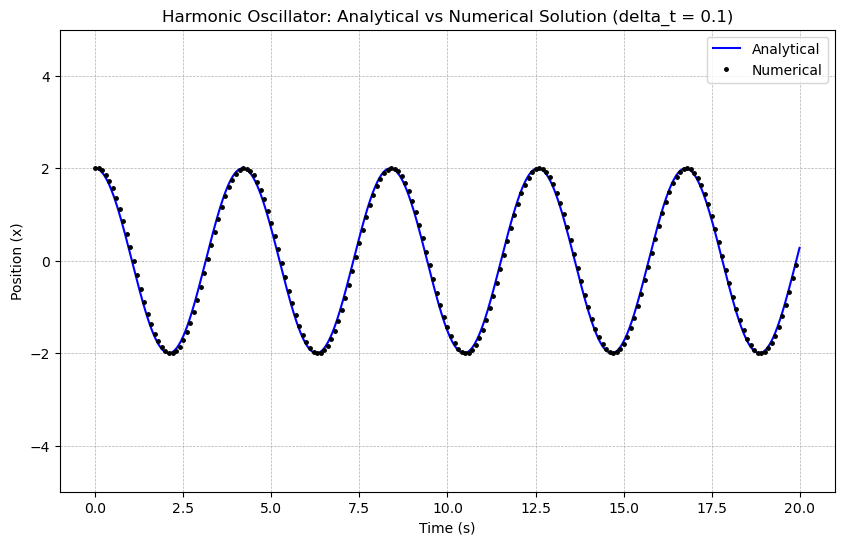

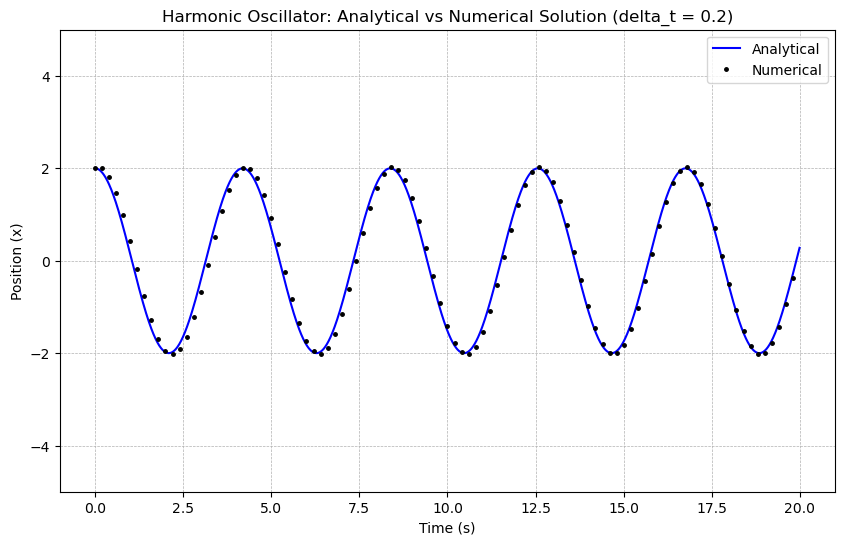

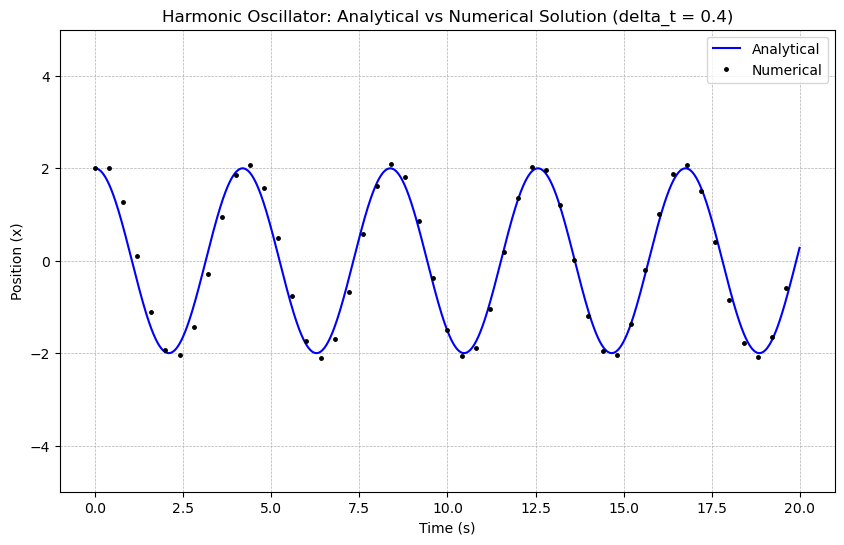

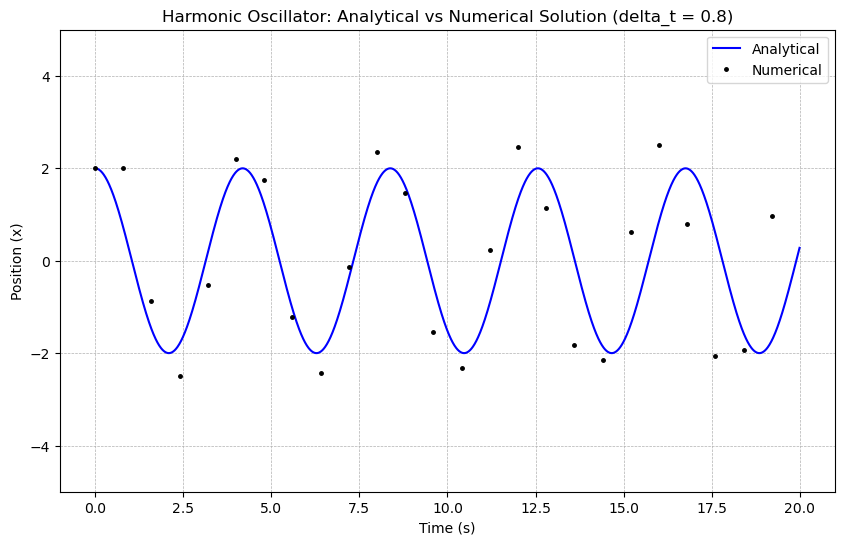

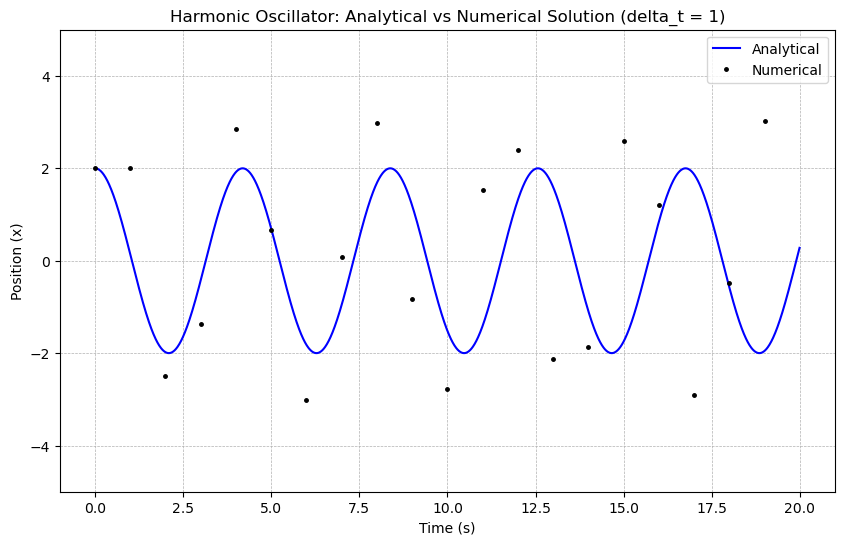

In [19]:
timesteps = [0.05, 0.1, 0.2, 0.4, 0.8, 1]

plt.figure(figsize=(12, 8))
for ts in timesteps:
    t_numerical, x_numerical = numerical_solution(ts)
    plt.plot(t_numerical, x_numerical, label=f'delta_t = {ts}')

plt.xlabel('Time (s)')
plt.ylabel('Position (x)')
plt.title('Harmonic Oscillator: Numerical Solution with Different Timesteps')
plt.legend()
plt.grid(True)
plt.ylim(-5, 5) 
plt.show()

def plot_solution(delta_t):
    t_numerical, x_numerical = numerical_solution(delta_t)
    
    t_analytical = np.arange(0, 20, 0.01) 
    y = analytical_solution(t_analytical)  
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_analytical, y, label='Analytical', color='blue') 
    plt.plot(t_numerical, x_numerical, 'k.', markersize=5, label='Numerical') 
    plt.xlabel('Time (s)')
    plt.ylabel('Position (x)')
    plt.title(f'Harmonic Oscillator: Analytical vs Numerical Solution (delta_t = {delta_t})')
    plt.legend()
    plt.grid(linestyle='--', linewidth=0.5)
    plt.ylim(-5, 5)  
    plt.show()

timesteps = [0.05, 0.1, 0.2, 0.4, 0.8, 1]

for ts in timesteps:
    plot_solution(ts)

With a very small timestep close to 0, the numerical values stay close to the analytical solution. As the timestep increases, errors build up, causing the values to grow uncontrollably, likely due to missing details in the calculations. Between 0.05 and 0.1, the numerical and analytical solutions match well, but from 0.2 onward, the accuracy worsens.